In [ ]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 48kB/s 
     |████████████████████████████████| 204kB 20.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=b57dc8990b0f175e9336421965d6eacfbb49d5176a0a64392f4c777d833ee84b
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar xf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark
import string
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder.appName("depress").getOrCreate()

sc = spark.sparkContext

In [ ]:
import pandas as pd
import io

df = spark.read.option("header", "true").option("multiLine", "true").option("quote", "\"").option("escape", "\"").option("inferSchema", "true").csv('Cleaned_Depression_Vs_Suicide.csv')
df.show()

+--------------------+------------+
|                text|       class|
+--------------------+------------+
|Feeling a bit dep...|SuicideWatch|
|Was going to hang...|SuicideWatch|
|Have you ever mai...|  depression|
|I haven't felt po...|  depression|
|Partners of those...|  depression|
|I'm worthless.I'v...|SuicideWatch|
|What's the best w...|SuicideWatch|
|I just want to fu...|SuicideWatch|
|Help with Nightma...|  depression|
|My depression has...|SuicideWatch|
|Can anyone relate...|  depression|
|Permanently miser...|SuicideWatch|
|I have been havin...|SuicideWatch|
|Reaching outSomeo...|SuicideWatch|
|I'm sure someone ...|  depression|
|Settings goals is...|  depression|
|I'm just tired   ...|  depression|
|I can’t stop cryi...|SuicideWatch|
|Hey Reddit.My nam...|  depression|
|i'm so fucking st...|SuicideWatch|
+--------------------+------------+
only showing top 20 rows



In [ ]:
total_rows = df.count() # The total amount of posts we have 
total_rows

609772

In [ ]:
post_lengths = df.rdd.map(lambda x: len(x.text))
post_lengths.take(10) # Show the lengths of the first 10 posts

[481, 572, 1219, 516, 649, 567, 267, 83, 350, 1745]

In [ ]:
average_post_length = post_lengths.sum() / totale_rows
print(post_lengths.min())
print(post_lengths.max())
print(average_post_length)

2
40297
1176.795928642181


In [ ]:
texts = df.rdd.map(lambda x : x.text)
texts.take(5)

["Feeling a bit depressedI've been in a big low all weekend. I don't know why death has actually crossed my mind a few times. I don't care to admit it to any of my friend because I feel disconnected from everyone. I feel so lonely, yet I feel so overwhelmed that I can't really talk to anyone. I've been pretty isolated for the past few days, mostly doing work. \n\nI just want someone to talk to, it doesn't have to be about depression. I'm a male college student, about to graduate. ",
 "Was going to hang myself but didn't have guts enough to kick away the chairI was all set to hang myself this morning. Had the noose around my neck, was standing on the chair, the whole nine yards.\n\nI just couldn't get the guts to kick away the chair.\n\nFeel more down and hopeless now than ever.\n\nHave tried to kill myself many times before mainly with drug overdoses. Not going to go that route though is that it'll likely just result in a long hospitalization against my will.\n\nLife has become intoler

In [ ]:
def lower_clean_str(x):
  lowercased_str = x.lower()
  for ch in string.punctuation:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def filter(word):
   if word not in stop:
    return word

In [ ]:
words = texts.map(lambda post: lower_clean_str(post)).flatMap( lambda post: post.split(" ")).map(lambda x: filter(x)).filter(lambda x: x is not None).filter(lambda x: x != "")
words.take(5)


['feeling', 'bit', 'depressedive', 'big', 'low']

In [ ]:
word_count = words.map( lambda word: (word, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda pair: pair[1], ascending = False)
word_count.take(10)

[('im', 1202526),
 ('dont', 833336),
 ('like', 810509),
 ('feel', 704298),
 ('want', 627313),
 ('know', 609032),
 ('life', 547364),
 ('get', 517916),
 ('ive', 438814),
 ('even', 432674)]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_df = spark.createDataFrame(word_count)

word_cloud_df.show()

+------+-------+
|    _1|     _2|
+------+-------+
|    im|1202526|
|  dont| 833336|
|  like| 810509|
|  feel| 704298|
|  want| 627313|
|  know| 609032|
|  life| 547364|
|   get| 517916|
|   ive| 438814|
|  even| 432674|
|  time| 426501|
|really| 416692|
|people| 410211|
|  cant| 402223|
| would| 378815|
|   one| 373920|
| think| 319247|
| going| 316714|
| never| 314062|
|    go| 309134|
+------+-------+
only showing top 20 rows



In [ ]:
import numpy
import pandas

def wordcloud(corpus_sdf):
    corpus_pdf = corpus_sdf.limit(500).toPandas()

    corpus_dict = {}
    for index, row in corpus_pdf.iterrows():
        corpus_dict[row['_1']] = row['_2']
        
    wordcloud = WordCloud().generate_from_frequencies(corpus_dict)
    plt.imshow(wordcloud);

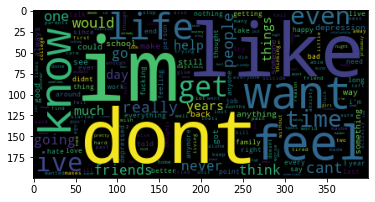

In [ ]:
wordcloud(word_cloud_df)

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(words.take(10000))
print(fdist)

<FreqDist with 2895 samples and 10000 outcomes>


In [ ]:
fdist.most_common(2)

[('im', 222), ('dont', 160)]

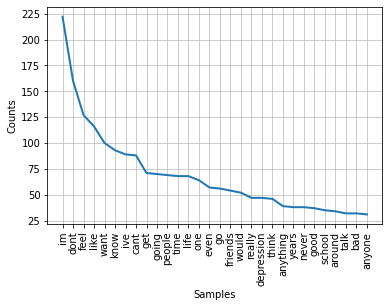

In [ ]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

Bigrams:

In [ ]:
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
# Ngrams with 'creature' as a member
depression_filter = lambda *w: 'depression' not in w
## Bigrams
finder = BigramCollocationFinder.from_words(words.take(100000))
# only bigrams that appear 3+ times
finder.apply_freq_filter(3)
# only bigrams that contain 'depression'
finder.apply_ngram_filter(depression_filter)
# return the 10 n-grams with the highest PMI
# print (finder.nbest(bigram_measures.likelihood_ratio, 10))
for i in finder.score_ngrams(bigram_measures.likelihood_ratio):
    print (i)

(('depression', 'anxiety'), 131.70544652948615)
(('anxiety', 'depression'), 72.22559030989585)
(('severe', 'depression'), 45.797027239998144)
(('suffering', 'depression'), 38.95904130927086)
(('major', 'depression'), 30.13600332875144)
(('suffer', 'depression'), 27.362614897322388)
(('struggling', 'depression'), 26.779261833819106)
(('chronic', 'depression'), 22.07980264585341)
(('diagnosed', 'depression'), 21.879939849418278)
(('noticed', 'depression'), 21.32728644706868)
(('dealing', 'depression'), 20.763148455855518)
(('ptsd', 'depression'), 20.66112977381583)
(('depression', 'suicidal'), 18.334598430478266)
(('depression', 'excuse'), 18.147180861872506)
(('struggled', 'depression'), 17.75320355097563)
(('history', 'depression'), 17.038040829154518)
(('depression', 'comes'), 12.459294837020794)
(('depression', 'meds'), 11.763935979998784)
(('understand', 'depression'), 11.436903905808226)
(('due', 'depression'), 10.702910067258937)
(('depression', 'since'), 9.537978108930261)
(('bac

Trigrams:

In [ ]:

from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 

trigram_measures = nltk.collocations.TrigramAssocMeasures()
# Ngrams with 'creature' as a member
depression_filter = lambda *w: 'lost' not in w
## Bigrams
triFinder = TrigramCollocationFinder.from_words(words.take(300000))
# only bigrams that appear 3+ times
triFinder.apply_freq_filter(3)
# only bigrams that contain 'creature'
triFinder.apply_ngram_filter(depression_filter)
# return the 10 n-grams with the highest PMI
# print (finder.nbest(bigram_measures.likelihood_ratio, 10))
for i in triFinder.score_ngrams(trigram_measures.likelihood_ratio):
    print (i)

(('feel', 'like', 'lost'), 9528.730032416675)
(('lost', 'feel', 'like'), 9527.328643443732)
(('lost', 'best', 'friend'), 1712.8097130707906)
(('like', 'ive', 'lost'), 290.3298650503469)
(('ive', 'lost', 'everything'), 246.46665777638367)
(('ive', 'lost', 'friends'), 245.98839845332736)
(('ive', 'already', 'lost'), 165.78922948724522)
(('im', 'completely', 'lost'), 129.51476728054848)
(('lost', 'almost', 'friends'), 61.18199632962903)
